<figure>
  <center><img style='height: 100%; width: 100%; object-fit: contain' src="../images/dalle_desert.png" /></center>
  <center><figcaption>What is the structure of chaos? Does it all begin with the Markov chain?</figcaption></center>
</figure>

### **Discrete Time Markov Chains**

A discrete-time random process, {${X_m,m=0,1,2,…}$}, is a sequence of random variables that are observed at different time steps. In the simplest case where the $X_m$'s are independent, the analysis of this process is straightforward. However, in many real-life situations, the $X_m$'s are not independent and we need to develop models where the value of $X_m$ depends on the previous values. One such model is a Markov chain which is typically the shorthand used for what is the discrete time Markov chain. 

In a Markov chain, $X_{m+1}$ depends on $X_m$, but given $X_m$, it does not depend on the other previous values $X_0, X_1, \ldots, X_{m-1}$. This means that conditioned on $X_m$, the random variable $X_{m+1}$ is independent of the random variables $X_0, X_1, \ldots, X_{m-1}$. Another way to look at it is, determination of future states only depends on the current state and not the past states. This Markov property is sometimes called **memorylessness**. In practice, Markov chains are used to model the evolution of states in probabilistic systems. For example, if we are modeling a queue at a bank, the number of people in the queue can be defined as the state of the system.



### **Formal Definition**

Let us define a random process {${X_n,n=0,1,2,\ldots}$}, where the random variables' ranges, $R_{X_i} = S \subseteq \{0,1,2,\ldots\}$, are discrete. 
For any positive integer $m$ and possible states $i_0, i_1, ..., i_{m}$, we say that the process is in state $i_m$ at time $m$ if $X_m = i_m$.
Formally, this process is a Markov chain if $$P(X_{m+1}=j|X_m=i,X_{m-1}=i_{m-1},\ldots,X_0=i_0) = P(X_{m+1}=j|X_m=i)$$ for all $m,j,i,i_0,i_1,\ldots i_{m-1}$. This is known as the **Markov Property**. The numbers $P(X_{m+1}=j|X_m=i)$ are called the transition probabilities and they do not depend on time. Thus, we can define a **transition probability matrix**:

$$p_{ij} = P(X_{m+1}=j|X_m=i)$$

Here, $p_{ij}$ is the probability of transitioning from state $i$ to state $j$.

In addition, we also have $p_{ij} = P(X_1=j|X_0=i) = P(X_2=j|X_1=i) = P(X_3=j|X_2=i) = \ldots$. This means that if the process is in state $i$, it will next make a transition to state $j$ with probability $p_{ij}$, independent of what particular time step we find ourselves at.

### **Code Example**

We can write Python code to simulate a Markov chain. The following code simulates a Markov chain with 12 states. The simulation can then be plotted to visualize the evolution of the chain.

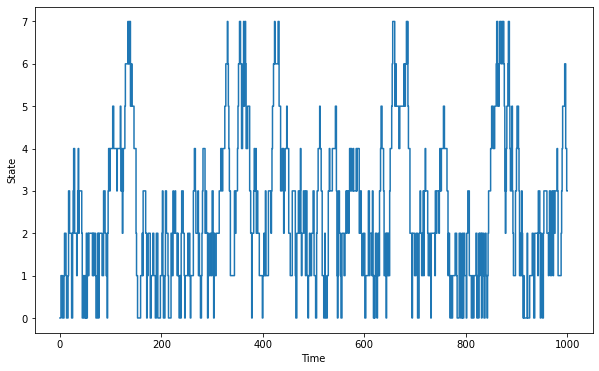

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# give me a numpy array of transition probabilities that is 12x12

# Transition probabilities
P = np.array([[0.5, 0.3, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0.2, 0.5, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
                [0.1, 0.2, 0.5, 0.2, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0.1, 0.2, 0.5, 0.2, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0.1, 0.2, 0.5, 0.2, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0.1, 0.2, 0.5, 0.2, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0.1, 0.2, 0.5, 0.2, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0.1, 0.2, 0.5, 0.2, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.5, 0.2, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.5, 0.2, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.5, 0.2],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.5]])

# Initial state
X = 0

# Number of steps
N = 1000

# Simulate the Markov chain
Xs = [X]
for n in range(N):
    # Sample the next state given the current state
    X = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], p=P[X, :])
    Xs.append(X)

# Plot the Markov chain
plt.figure(figsize=(10, 6))
plt.step(range(N+1), Xs, where='post')
plt.xlabel('Time')
plt.ylabel('State')
plt.show()

Or with fewer states:

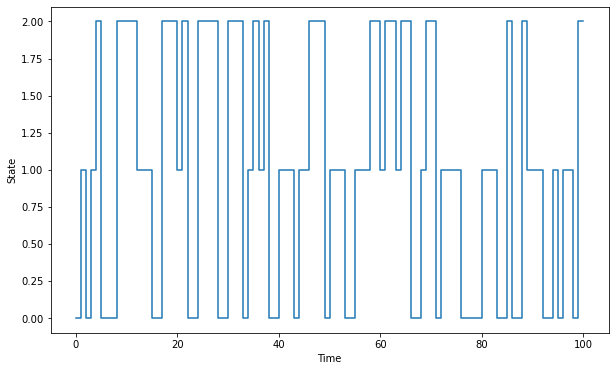

In [2]:
# Transition matrix
P = np.array([[0.5, 0.3, 0.2],
              [0.2, 0.5, 0.3],
              [0.3, 0.2, 0.5]])

# Initial state
X = 0

# Number of steps
N = 100

# Simulate the Markov chain
Xs = [X]
for n in range(N):
    X = np.random.choice([0, 1, 2], p=P[X, :])
    Xs.append(X)

# Plot the Markov chain
plt.figure(figsize=(10, 6))
plt.step(range(N+1), Xs, where='post')
plt.xlabel('Time')
plt.ylabel('State')
plt.show()

### **Distribution Evolution**

Markov processes have cool and simply properties which allow us to directly calculate the evolution of the probability distribution through time, using basic linear algebra! How cool is that? Let's see how this works.

In practice, if we're given the probability distribution at time step 0, we can calculate the probability distribution at time step 1. This is done by multiplying the transition probability matrix by the initial distribution. We can then calculate the distribution at time step 2 by multiplying the transition probability matrix by the distribution at time step 1. This process can be repeated to calculate the distribution at any time step!

Consider a state space $X_n \in S = \{0,1,2,\ldots,r\}$, where $r$ is the number of states.
The initial distribution, $\pi^{(0)}$, is defined by the row vector:

$$\pi^{(0)} = [P(X_0=0), P(X_0=1), \ldots, P(X_0=r)]$$

The distribution at the next time step can be determined using the **Law of Total Probability**:

$$P(X_1=j) = \sum_{j=0}^r P(X_1=j|X_{0}=i)P(X_{0}=j)$$

of course we recognize this as a matrix multiplication:

$$\pi^{(1)} = \pi^{(0)}p$$

and in general:

$$\pi^{(n)} = \pi^{(n-1)}p$$

$$\pi^{(n)} = \pi^{(0)}p^n$$

All you have to do is calculate the matrix $p$ and the initial distribution $\pi^{(0)}$ and you can calculate the distribution at any time step!

Now what if we ask another question. What is the probability of going from state $i$ to state $j$ in $2$ steps? Once again, we can use the law of total probability:

$$P(X_2=j|X_0=i) = \sum_{k=0}^r P(X_2=j|X_{1}=k,X_{0}=i)P(X_{1}=k|X_{0}=i)$$



### **Sources**

Introduction. (n.d.). Www.probabilitycourse.com. Retrieved January 25, 2023, from https://www.probabilitycourse.com/chapter11/11_2_1_introduction.php

‌Markov Chains | Brilliant Math & Science Wiki. (n.d.). Brilliant.org. https://brilliant.org/wiki/markov-chains/#:~:text=A%20Markov%20chain%20is%20a